# What are the most popular and well paid programming languages in the USA or where to invest your time to get good money.

<img src='https://www.pcquest.com/wp-content/uploads/2016/12/programming-languages.jpg'></img>

## Introduction

In this article, we are going to analyze real data of 2019 stackoverflow survey to analyze most popular and well paid programming languages on USA market

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSS1mvZ_iIRrWl08VZ-vxCwApQItiV7KX1RTrldjflujvWI2_cb-w'></img>

2019 Stack Overflow Developer Survey, the largest and most comprehensive survey of software developers (and anyone else who codes!) on Earth.


## Motivation behind this project includes answer to following questions:

Top 10 Most common program languages in use on USA market 
 
Salary comparison for top10 most common program language on USA market 
 
top 3 best paid program languages or where to invest your time to get good money on USA market 

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
pd.pandas.set_option('display.max_columns', None)
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

C:\Users\shevcdim\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading survey data
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [3]:
# Sample 2019 Data
df.head()


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

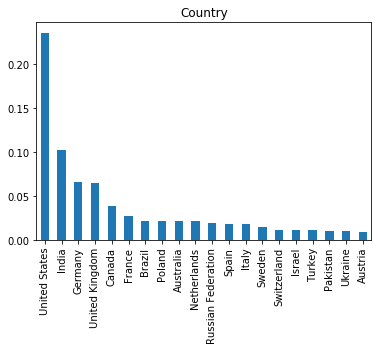

In [4]:
#Let's see countries distribution
count_vals = df.Country.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:20]/df.shape[0]).plot(kind="bar");
plt.title("Country");

In [5]:
#let's identify top 10 most popular languages on USA Market
df = df[(df.Country == 'United States')]

In [6]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

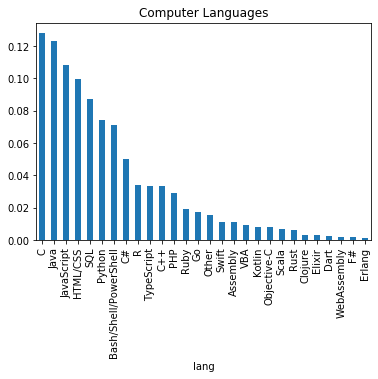

In [7]:
possible_vals = ['Assembly', 'Bash/Shell/PowerShell', 'C', 'C++' , 'C#' , 'Clojure' , 'Dart' , 'Elixir',
                 'Erlang', 'F#' , 'Go' , 'HTML/CSS' , 'Java' ,'JavaScript', 'Kotlin' , 'Objective-C', 
                 'PHP','Python', 'R' , 'Ruby','Rust','Scala','SQL','Swift','TypeScript','VBA','WebAssembly', 'Other']

def clean_and_plot(df, title='Computer Languages', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the Language column.
    '''
    study = df['LanguageWorkedWith'].value_counts().reset_index()
    study.rename(columns={'index': 'lang', 'LanguageWorkedWith': 'count'}, inplace=True)
    study_df = total_count(study, 'lang', 'count', possible_vals)

    study_df.set_index('lang', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df, plot=True)

In [8]:
#now we can see top 10 most common Computer languages in use
props_df.head(10)


,count
lang,
C,0.128022
Java,0.122797
JavaScript,0.108274
HTML/CSS,0.099537
SQL,0.087294
Python,0.074409
Bash/Shell/PowerShell,0.071302
C#,0.050041
R,0.034271


In [9]:
top10lang = props_df.head(10).index.tolist()
top10lang

['C',
 'Java',
 'JavaScript',
 'HTML/CSS',
 'SQL',
 'Python',
 'Bash/Shell/PowerShell',
 'C#',
 'R',
 'TypeScript']

In [10]:
#Let's identify avg Salary for top 10 languages

In [11]:
#get only fields we are interested in and remove NA records for salary
dfp = df[{'LanguageWorkedWith','Country', 'Student','ConvertedComp'}]
dfp = dfp.dropna(subset=['ConvertedComp'], axis=0)
#we 
dfp

,ConvertedComp,Country,Student,LanguageWorkedWith
3,61000.0,United States,No,C;C++;C#;Python;SQL
12,90000.0,United States,No,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...
21,103000.0,United States,No,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...
22,69000.0,United States,No,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...
25,114000.0,United States,No,Bash/Shell/PowerShell;C++;C#;HTML/CSS;JavaScri...
...,...,...,...,...
88312,120000.0,United States,No,HTML/CSS;JavaScript
88321,2000000.0,United States,No,C++;Python;Scala;SQL
88323,180000.0,United States,No,Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;...
88324,2000000.0,United States,No,Bash/Shell/PowerShell;C;Clojure;HTML/CSS;Java;...


In [12]:
#let's put dummy variables for languages for future calcualtion based on Salary

dfp_processed = pd.concat([dfp.drop('LanguageWorkedWith', axis=1), dfp['LanguageWorkedWith'].str.get_dummies(sep=';')],axis=1)


In [13]:
dfp_processed

,ConvertedComp,Country,Student,Assembly,Bash/Shell/PowerShell,C,C#,C++,Clojure,Dart,Elixir,Erlang,F#,Go,HTML/CSS,Java,JavaScript,Kotlin,Objective-C,Other(s):,PHP,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA,WebAssembly
3,61000.0,United States,No,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
12,90000.0,United States,No,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
21,103000.0,United States,No,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0
22,69000.0,United States,No,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
25,114000.0,United States,No,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88312,120000.0,United States,No,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88321,2000000.0,United States,No,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
88323,180000.0,United States,No,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
88324,2000000.0,United States,No,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


350000.0

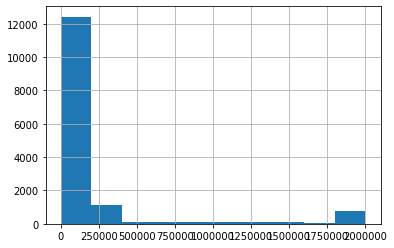

In [14]:
#Let's calculate avarage salary for top 10 identified before
dfp_processed.ConvertedComp.hist()
dfp_processed.ConvertedComp.quantile(0.90)



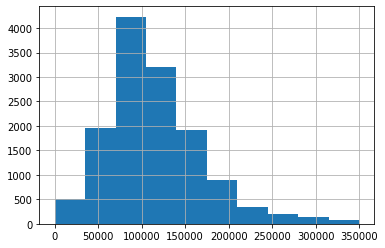

In [15]:
# as we see huge variation in the Salary data we will take 90% quantile data as max threshold for future analysis so we exclude outliers
dfp_pc = dfp_processed[(dfp_processed.ConvertedComp <= dfp_processed.ConvertedComp.quantile(0.90))]
dfp_pc.ConvertedComp.hist()

In [16]:
#Let's get average Annual salary for top 10 languages

top3 = pd.DataFrame(columns =['Language', 'Average salary']) 

for col in top10lang:
    dict1 = {}
    salary = dfp_pc[(dfp_pc[col] == 1)].ConvertedComp
    top3 = top3.append({'Language':col, 'Average salary':salary.mean()}, ignore_index=True)
    print("Average salary for {0} is around {1:8.2f} USD annually".format(col,salary.mean()))
    
# Creates DataFrame to calculate top 3 well paid languaged later
#top3 = pd.DataFrame(rows_list,columns =['Language', 'Average salary']) 


Average salary for C is around 119525.36 USD annually
Average salary for Java is around 118623.30 USD annually
Average salary for JavaScript is around 110844.37 USD annually
Average salary for HTML/CSS is around 107873.09 USD annually
Average salary for SQL is around 110674.63 USD annually
Average salary for Python is around 116817.46 USD annually
Average salary for Bash/Shell/PowerShell is around 117739.02 USD annually
Average salary for C# is around 107361.53 USD annually
Average salary for R is around 110179.80 USD annually
Average salary for TypeScript is around 115587.41 USD annually


In [17]:
#Now let's see top 3 best paid program languages or where to invest your time to get good money on USA market
top3.sort_values(by='Average salary', ascending=False).head(3)

,Language,Average salary
0,C,119525.355121
1,Java,118623.303328
6,Bash/Shell/PowerShell,117739.023058


## Conclusion

In this article, we took a look at following questions:
### Top 10 Most common program languages in use on USA market

language                Share	

C	                    12.8%

Java	                12.3%

JavaScript	            10.8%

HTML/CSS	            9.9%

SQL	                    8.7%

Python	                7.4%

Bash/Shell/PowerShell	7.1%

C#	                    5%

R	                    3.4%

TypeScript	            3.3%

### Salary comparison for top10 most common program language on USA market
Average salary for C is around 119525.36 USD annually

Average salary for Java is around 118623.30 USD annually

Average salary for JavaScript is around 110844.37 USD annually

Average salary for HTML/CSS is around 107873.09 USD annually

Average salary for SQL is around 110674.63 USD annually

Average salary for Python is around 116817.46 USD annually

Average salary for Bash/Shell/PowerShell is around 117739.02 USD annually

Average salary for C# is around 107361.53 USD annually

Average salary for R is around 110179.80 USD annually

Average salary for TypeScript is around 115587.41 USD annually

### Top 3 best paid program languages or where to invest your time to get good money on USA market
Language	            Average annual salary
C	                    119525.35 USD 

Java	                118623.30 USD

Bash/Shell/PowerShell	117739.02 USD


## References

Stackoverflow Developer Survey Data: [https://insights.stackoverflow.com/survey](https://insights.stackoverflow.com/survey) <br>
